In [36]:
import pandas as pd
from sklearn import cross_validation
import numpy as np
from sklearn import svm
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics
data=pd.read_csv("D:\\UC_CS_COURSES\\ML\\Project\\data.csv",index_col=False)
"""PREPROCESSING DATA"""
data=data.fillna(0) #removing null values in data if exists
data.drop("id",inplace=True,axis=1)
#changing benign to 0 and malignant to 1
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
X=data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y=data['diagnosis']
#train, test = train_test_split(data, test_size = 0.3)

In [37]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier(criterion='entropy')
clf3=svm.SVC(kernel='linear')
#Accuracy scores with 5-fold cross validation
print("=================================================")
print("-------5-FOLD CROSS VALIDATION-------------------")
labels = ['Logistic Regression', 'Decision Trees', 'SVM']
for clf, label in zip([clf1, clf2, clf3], labels):
    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))
print("=================================================")

-------5-FOLD CROSS VALIDATION-------------------
Accuracy: 0.95 (+/- 0.02) [Logistic Regression]
Accuracy: 0.92 (+/- 0.02) [Decision Trees]
Accuracy: 0.95 (+/- 0.02) [SVM]


In [38]:
#Accuracy scores with 10-fold cross validation
print("=================================================")
print("-------10-FOLD CROSS VALIDATION-------------------")
labels = ['Logistic Regression', 'Decision Trees', 'SVM']
for clf, label in zip([clf1, clf2, clf3], labels):
    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=10, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))
print("=================================================")

-------10-FOLD CROSS VALIDATION-------------------
Accuracy: 0.95 (+/- 0.02) [Logistic Regression]
Accuracy: 0.93 (+/- 0.03) [Decision Trees]
Accuracy: 0.95 (+/- 0.02) [SVM]


In [39]:
"""USING ENSEMBLE LEARNING MODEL"""
from mlxtend.classifier import EnsembleVoteClassifier
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])
#Accuracy scores with 5-fold cross validation
print("=================================================")
print("===ENSEMBLE LEARNING===")
print("-------5-FOLD CROSS VALIDATION-------------------")
labels = ['Logistic Regression', 'Decision Trees', 'SVM','Ensemble']
for clf, label in zip([clf1, clf2, clf3,eclf], labels):
    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))
print("=================================================")

===ENSEMBLE LEARNING===
-------5-FOLD CROSS VALIDATION-------------------
Accuracy: 0.95 (+/- 0.02) [Logistic Regression]
Accuracy: 0.94 (+/- 0.01) [Decision Trees]
Accuracy: 0.95 (+/- 0.02) [SVM]
Accuracy: 0.95 (+/- 0.01) [Ensemble]


In [40]:
"""USING ENSEMBLE LEARNING MODEL"""
from mlxtend.classifier import EnsembleVoteClassifier
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])
#Accuracy scores with 10-fold cross validation
print("=================================================")
print("===ENSEMBLE LEARNING===")
print("-------10-FOLD CROSS VALIDATION-------------------")
labels = ['Logistic Regression', 'Decision Trees', 'SVM','Ensemble']
for clf, label in zip([clf1, clf2, clf3,eclf], labels):
    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=10, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))
print("=================================================")

===ENSEMBLE LEARNING===
-------10-FOLD CROSS VALIDATION-------------------
Accuracy: 0.95 (+/- 0.02) [Logistic Regression]
Accuracy: 0.94 (+/- 0.02) [Decision Trees]
Accuracy: 0.95 (+/- 0.02) [SVM]
Accuracy: 0.96 (+/- 0.02) [Ensemble]


In [47]:
y = data.diagnosis                          # M or B 
list = ['diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


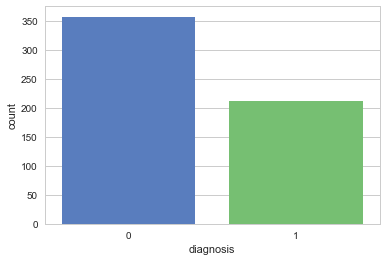

In [49]:
%matplotlib inline
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

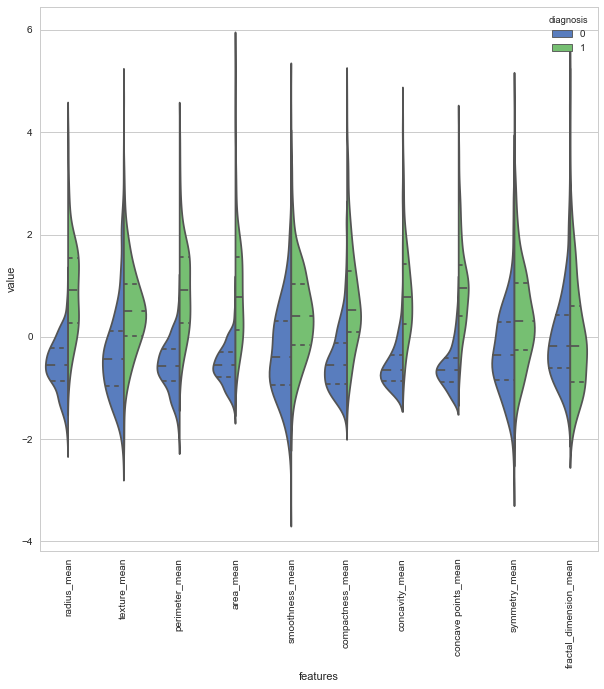

In [52]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

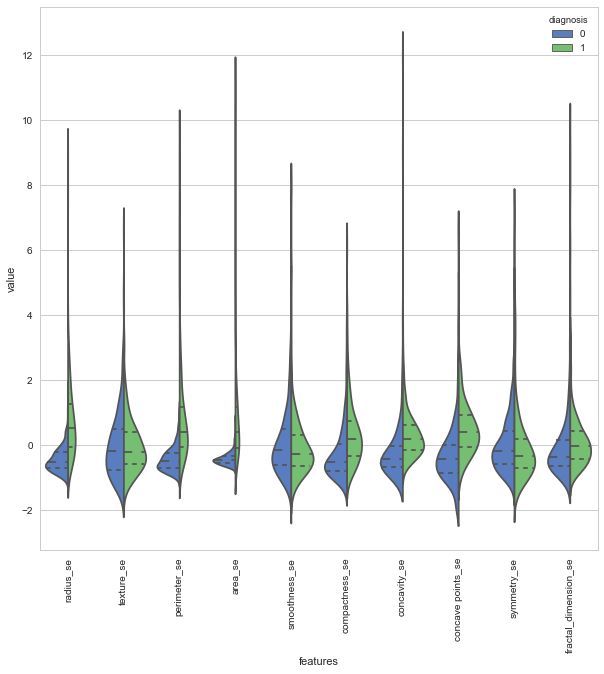

In [53]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

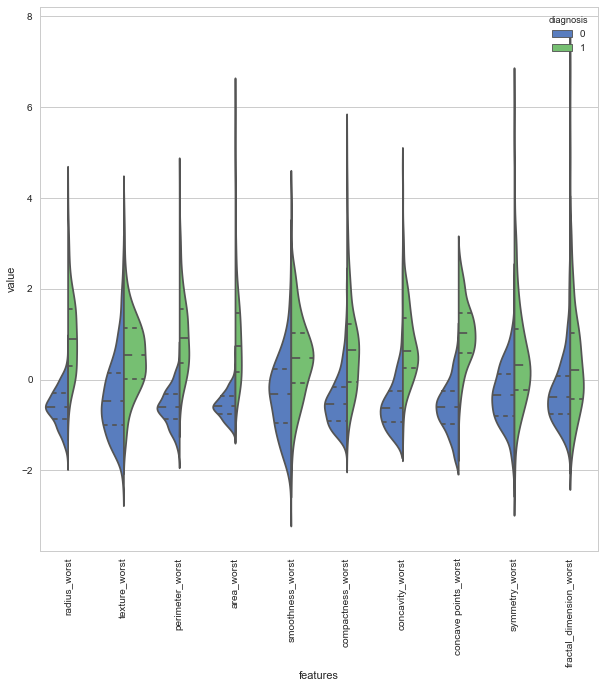

In [54]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,20:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)